In [1]:
import tensorflow as tf
from os import path, listdir
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

/Users/sstonn/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
BASE_DATA_DIR = './datasets/cats_and_dogs_filtered/'

train_dir = path.join(BASE_DATA_DIR, "train")
validation_dir = path.join(BASE_DATA_DIR, "validation")

# Directory with training cat/dog pictures
train_cats_dir = path.join(train_dir, 'cats')
train_dogs_dir = path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = path.join(validation_dir, 'cats')
validation_dogs_dir = path.join(validation_dir, 'dogs')


print(f"Contents of base directory: {listdir(BASE_DATA_DIR)}")

print(f"\nContents of train directory: {train_dir}")

print(f"\nContents of validation directory: {validation_dir}")

Contents of base directory: ['vectorize.py', 'train', 'validation']

Contents of train directory: ./datasets/cats_and_dogs_filtered/train

Contents of validation directory: ./datasets/cats_and_dogs_filtered/validation


In [3]:
train_cat_fnames = listdir(train_cats_dir)
train_dog_fnames = listdir(train_dogs_dir)

print(f"5 files in cats subdir: {train_cat_fnames[:5]}")
print(f"5 files in dogs subdir: {train_dog_fnames[:5]}")

5 files in cats subdir: ['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg', 'cat.749.jpg', 'cat.991.jpg']
5 files in dogs subdir: ['dog.775.jpg', 'dog.761.jpg', 'dog.991.jpg', 'dog.749.jpg', 'dog.985.jpg']


In [4]:
print(f'total training cat images: {len(listdir(train_cats_dir))}')
print(f'total training dog images: {len(listdir(train_dogs_dir))}')

print(f'total validation cat images: {len(listdir(validation_cats_dir))}')
print(f'total validation dog images: {len(listdir(validation_dogs_dir))}')

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [1]:
# Parameters for your graph; you will output images in a 4x4 configuration
nrows = 4
ncols = 4

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

next_cat_pix = [path.join(train_cats_dir, fname)
                for fname in random.sample(train_cat_fnames, k=8)]

next_dog_pix = [path.join(train_dogs_dir, fname)
                for fname in random.sample(train_dog_fnames, k=8)]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

NameError: name 'plt' is not defined

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomTranslation
from tensorflow.nn import relu, sigmoid

FILL_MODE = 'nearest'

data_augmentation = Sequential(
    [
        Input(shape=(150, 150, 3)),
        RandomFlip("horizontal"),
        RandomRotation(0.2, fill_mode=FILL_MODE),
        RandomTranslation(0.2, 0.2, fill_mode=FILL_MODE),
        RandomZoom(0.2, fill_mode=FILL_MODE)
    ]
)

model = Sequential(
    [
        data_augmentation,
        Rescaling(1/255),
        Conv2D(16, (3, 3), activation=relu),
        MaxPooling2D(2, 2),
        Conv2D(32, (3, 3), activation=relu),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation=relu),
        Flatten(),
        Dense(512, activation=relu),
        Dense(1, activation=sigmoid)
    ]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(
        learning_rate=0.001
    ),
    loss="binary_crossentropy",
    metrics=[
        "accuracy"
    ]
)

In [13]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=20,
    label_mode="binary"
)

validation_data = image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=20,
    label_mode="binary"
)

SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE)
validation_data = validation_data.cache().prefetch(PREFETCH_BUFFER_SIZE)

history = model.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    verbose=1
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.7487 - loss: 0.5168 - val_accuracy: 0.7370 - val_loss: 0.5632
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.7679 - loss: 0.4745 - val_accuracy: 0.7580 - val_loss: 0.5133
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.7606 - loss: 0.4842 - val_accuracy: 0.7370 - val_loss: 0.5270
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.7776 - loss: 0.4872 - val_accuracy: 0.7370 - val_loss: 0.5294
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.7702 - loss: 0.4847 - val_accuracy: 0.7460 - val_loss: 0.5876
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.7730 - loss: 0.4808 - val_accuracy: 0.7130 - val_loss: 0.5920
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.7743 - loss: 0.5018 - val_accuracy: 0.7390 - val_loss: 0.5537
Epoc

In [14]:
!pip3 install ipywidgets
from ipywidgets import widgets

# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image, verbose=0)[0][0]
    
    with out:
        if prediction > 0.5:
            print(filename + " is a dog")
        else:
            print(filename + " is a cat")


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    
    items = change.new
    for item in items: # Loop if there is more than one file uploaded  
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)


uploader.observe(on_upload_change, names='value')


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()

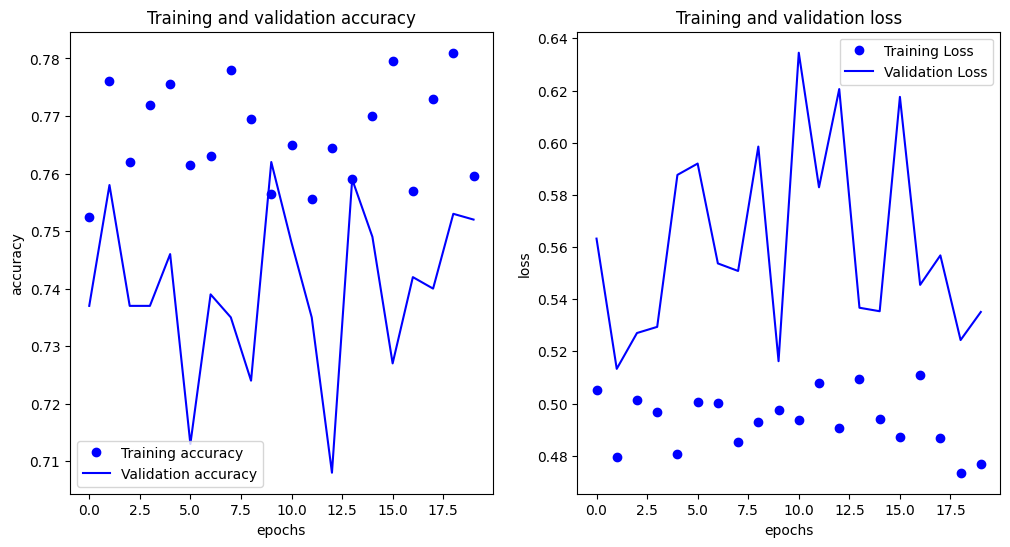

In [15]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()
    
    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()
    
    plt.show()

plot_loss_acc(history)

In [16]:
def demo_augmentation(sample_image, model, num_aug):
    '''Takes a single image array, then uses a model to generate num_aug transformations'''

    # Instantiate preview list
    image_preview = []

    # Convert input image to a PIL image instance
    sample_image_pil = tf.keras.utils.array_to_img(sample_image)

    # Append the result to the list
    image_preview.append(sample_image_pil)

    # Apply the image augmentation and append the results to the list
    for i in range(NUM_AUG):
        sample_image_aug = model(tf.expand_dims(sample_image, axis=0))
        sample_image_aug_pil = tf.keras.utils.array_to_img(tf.squeeze(sample_image_aug))
        image_preview.append(sample_image_aug_pil)

    # Instantiate a subplot
    fig, axes = plt.subplots(1, NUM_AUG + 1, figsize=(12, 12))

    # Preview the images.
    for index, ax in enumerate(axes):
        ax.imshow(image_preview[index])
        ax.set_axis_off()

        if index == 0:
            ax.set_title('original')
        else:
            ax.set_title(f'augment {index}')

In [18]:
# Get a batch of images
sample_batch = list(train_data.take(1))[0][0]
print(f'images per batch: {len(sample_batch)}')

images per batch: 20


2024-12-30 13:04:15.089115: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


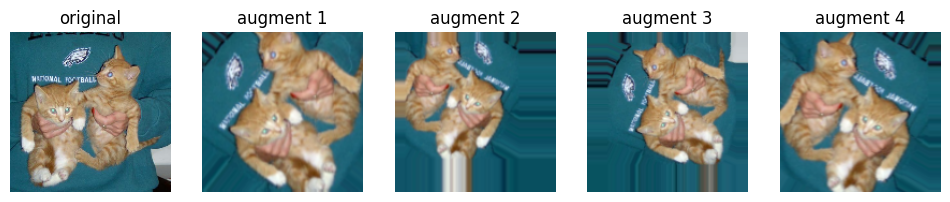

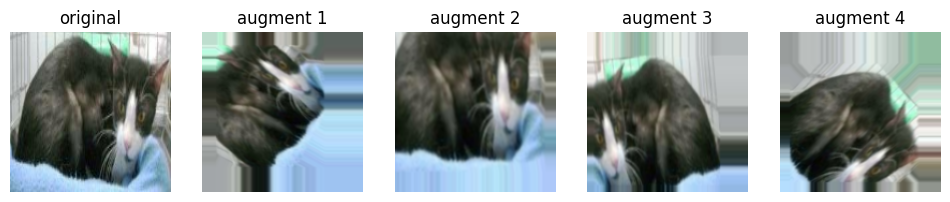

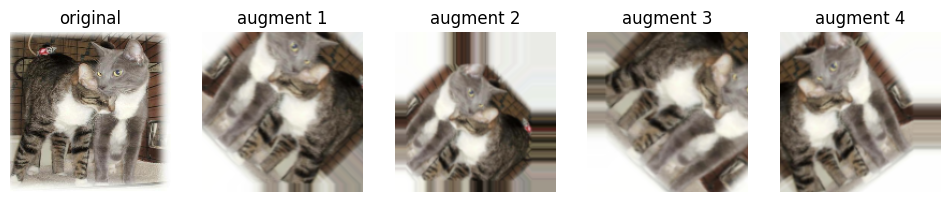

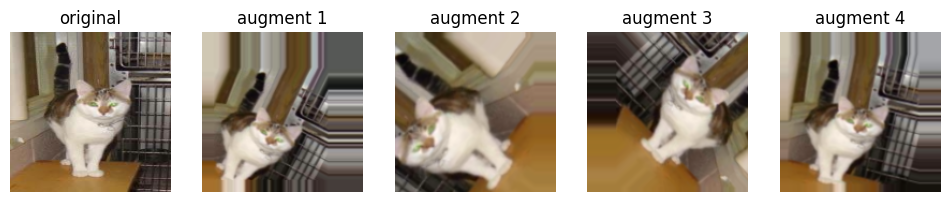

In [19]:
NUM_AUG = 4

# Apply the transformations to the first 4 images
demo_augmentation(sample_batch[0], data_augmentation, NUM_AUG)
demo_augmentation(sample_batch[1], data_augmentation, NUM_AUG)
demo_augmentation(sample_batch[2], data_augmentation, NUM_AUG)
demo_augmentation(sample_batch[3], data_augmentation, NUM_AUG)

# Uncomment the line below to delete the variable to free up some memory
# del sample_batch